# Videogames Sales

My project is to analyze the most sold videogames over the course of history. I want to know some relevant data, which games are the most sold and some questions about Genre and Platform. I want to thank Jovian for teaching me valuable knowledge that I'm sure I will use in my job. [Course link](http://zerotopandas.com)

In [63]:
project_name = "videogames-data-course-project" # change this

In [62]:
!pip install jovian --upgrade -q

     |████████████████████████████████| 71kB 1.6MB/s 


In [64]:
import jovian

In [92]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/alejoso76/videogames-data-course-project


'https://jovian.ml/alejoso76/videogames-data-course-project'

## Data Preparation and Cleaning

We'll download this file manually and the loading it into our notebook because the downloaded file is in .zip format (It is easier to do it like this). The file will be named: **vgsales.csv**. You can get it from [here](https://www.kaggle.com/gregorut/videogamesales/discussion/163324), then unzip it and load it on your workspace.

The next step is to load the file into a Pandas dataframe.

In [1]:
import pandas as pd

In [2]:
videogames_sales_df = pd.read_csv('vgsales.csv')

Here is the basic structure of the dataset.

In [3]:
videogames_sales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Here's what we can tell by looking at the data frame:

The file provides a list of video games with sales greater than 100,000 copies.
Fields include:

* Rank - Ranking of overall sales

* Name - The games name

* Platform - Platform of the games release (i.e. PC,PS4, etc.)

* Year - Year of the game's release

* Genre - Genre of the game

* Publisher - Publisher of the game

* NA_Sales - Sales in North America (in millions)

* EU_Sales - Sales in Europe (in millions)

* JP_Sales - Sales in Japan (in millions)

* Other_Sales - Sales in the rest of the world (in millions)

* Global_Sales - Total worldwide sales.

We can also view some basic information about the data frame using the .info method.

In [ ]:
videogames_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "alejoso76/videogames-data-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/alejoso76/videogames-data-course-project


'https://jovian.ml/alejoso76/videogames-data-course-project'

All the columns names are presented below:

In [ ]:
videogames_sales_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

As per the project requirements for rows and columns...

In [ ]:
videogames_sales_df.shape

(16598, 11)

We completely nailed that! :)

### Nan Colums
Now we have to check if we have some missing values.

In [ ]:
videogames_sales_df.Rank.isna().sum()

0

In [ ]:
videogames_sales_df.Name.isna().sum()

0

In [ ]:
videogames_sales_df.Platform.isna().sum()

0

In [ ]:
videogames_sales_df.Year.isna().sum()

271

In [ ]:
videogames_sales_df.Genre.isna().sum()

0

In [ ]:
videogames_sales_df.Publisher.isna().sum()

58

In [ ]:
videogames_sales_df.NA_Sales.isna().sum()

0

In [ ]:
videogames_sales_df.EU_Sales.isna().sum()

0

In [ ]:
videogames_sales_df.JP_Sales.isna().sum()

0

In [ ]:
videogames_sales_df.Other_Sales.isna().sum()

0

In [ ]:
videogames_sales_df.Global_Sales.isna().sum()

0

Meaning that in the Year field we have 271 Nan values and in the Publisher field we have 58 of those. 
Now we have to take care of them.

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "alejoso76/videogames-data-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/alejoso76/videogames-data-course-project


'https://jovian.ml/alejoso76/videogames-data-course-project'

### Cleaning those Nan values
For my analysis, I will only need the top 150 games. In the top 150 games ordered by sales there are not Nan nor wrong values.

In [7]:
top_150_df = videogames_sales_df.head(150)

In [ ]:
top_150_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
145,146,Metal Gear Solid,PS,1998.0,Action,Konami Digital Entertainment,3.18,1.83,0.78,0.24,6.03
146,147,The Last of Us,PS3,2013.0,Action,Sony Computer Entertainment Europe,2.41,2.28,0.28,1.01,5.99
147,148,Final Fantasy XII,PS2,2006.0,Role-Playing,Square Enix,1.88,0.00,2.33,1.74,5.95
148,149,LittleBigPlanet,PS3,2008.0,Platform,Sony Computer Entertainment,2.80,2.05,0.17,0.90,5.92


Now we check again if we have some Nan values:

In [ ]:
top_150_df.Year.isna().sum()

0

In [ ]:
top_150_df.Publisher.isna().sum()

0

That works for our data cleaning proccess :-)

In [ ]:
top_150_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          150 non-null    int64  
 1   Name          150 non-null    object 
 2   Platform      150 non-null    object 
 3   Year          150 non-null    float64
 4   Genre         150 non-null    object 
 5   Publisher     150 non-null    object 
 6   NA_Sales      150 non-null    float64
 7   EU_Sales      150 non-null    float64
 8   JP_Sales      150 non-null    float64
 9   Other_Sales   150 non-null    float64
 10  Global_Sales  150 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 13.0+ KB


Some basic rows and columns info about our top 150 data frame.

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "alejoso76/videogames-data-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/alejoso76/videogames-data-course-project


'https://jovian.ml/alejoso76/videogames-data-course-project'



## Exploratory Analysis and Visualization

TODO

For the numeric columns, we can view statistical information like: Mean, standard deviation, minimum/maximum values and number of non-empty values.

From the full data frame:

In [ ]:
videogames_sales_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


And from our top 150 games data frame:

In [ ]:
top_150_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000
mean,75.500000,2005.300000,5.708867,3.543267,1.587200,1.103333,11.94240
std,43.445368,7.391951,5.188504,3.072281,1.861846,1.330852,8.94899
min,1.000000,1982.000000,0.070000,0.000000,0.000000,0.000000,5.84000
25%,38.250000,2001.000000,3.010000,1.972500,0.130000,0.475000,6.90250
50%,75.500000,2007.000000,4.285000,2.800000,0.850000,0.780000,8.93000
75%,112.750000,2011.000000,6.577500,4.015000,2.667500,1.252500,13.37000
max,150.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.74000


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "alejoso76/videogames-data-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/alejoso76/videogames-data-course-project


'https://jovian.ml/alejoso76/videogames-data-course-project'

## Visualization with plots

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now, I want to see the distribution of the Global, North America, Europe, Japan and Other sales.

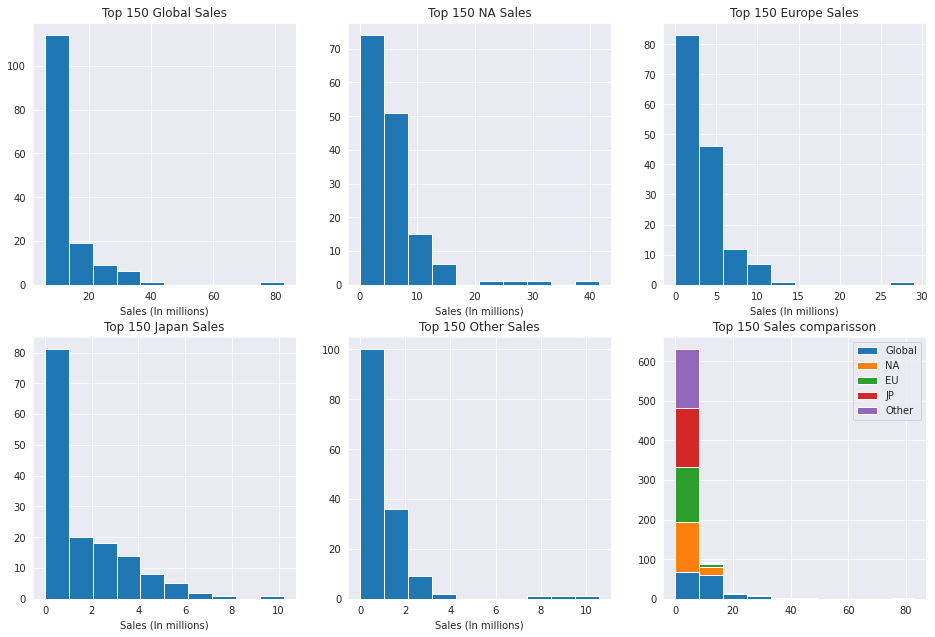

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
fig.subplots_adjust(top=3.0, bottom=2.0)

axes[0,0].set_title('Top 150 Global Sales')
axes[0,0].set_xlabel('Sales (In millions)')
axes[0,0].hist(top_150_df.Global_Sales)

axes[0,1].set_title('Top 150 NA Sales')
axes[0,1].set_xlabel('Sales (In millions)')
axes[0,1].hist(top_150_df.NA_Sales)

axes[0,2].set_title('Top 150 Europe Sales')
axes[0,2].set_xlabel('Sales (In millions)')
axes[0,2].hist(top_150_df.EU_Sales)

axes[1,0].set_title('Top 150 Japan Sales')
axes[1,0].set_xlabel('Sales (In millions)')
axes[1,0].hist(top_150_df.JP_Sales)

axes[1,1].set_title('Top 150 Other Sales')
axes[1,1].set_xlabel('Sales (In millions)')
axes[1,1].hist(top_150_df.Other_Sales)

axes[1,2].set_title('Top 150 Sales comparisson')
axes[1,2].hist([top_150_df.Global_Sales, top_150_df.NA_Sales, top_150_df.EU_Sales, top_150_df.JP_Sales, top_150_df.Other_Sales], 
         stacked=True);
axes[1,2].legend(['Global', 'NA', 'EU', 'JP', 'Other']);

## Asking and Answering Questions

1. How is the distribution of games genres on the top 150 games?
2. Which are the most used Platforms in the top 150 games?
3. What are the top 5 games Genre in the top 150 of sales?
4. What is the top selling game for every year in the top 150?
5. Which region has the most sold games among the top 10 most sold games?


### Question 1
I want to know is the distribution of games genres on the top 150 games using a bar plot.

In [ ]:
genre_top_150_df = top_150_df.Genre

In [ ]:
genre_top_150_df

0            Sports
1          Platform
2            Racing
3            Sports
4      Role-Playing
           ...     
145          Action
146          Action
147    Role-Playing
148        Platform
149    Role-Playing
Name: Genre, Length: 150, dtype: object

In [112]:
genre_top_150_df = top_150_df.groupby(['Genre']).count()

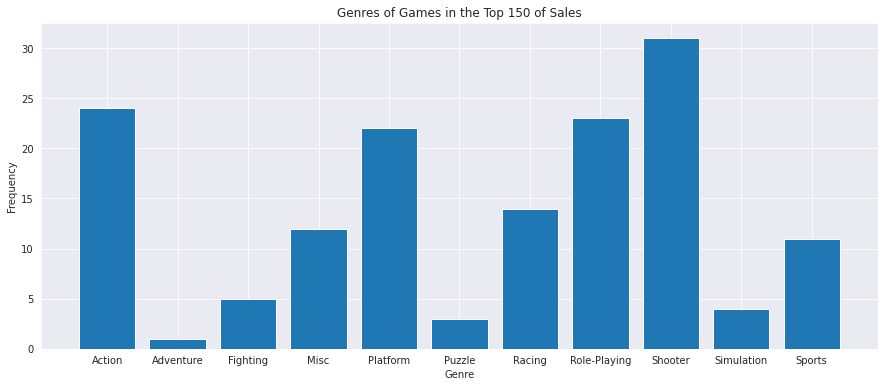

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
plt.title("Genres of Games in the Top 150 of Sales")
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.bar(genre_top_150_df.index, genre_top_150_df.Rank);

## Question 2
I want to know which are the most used Platforms in the top 150 games.

In [90]:
top_150_df.groupby('Platform')['Platform'].count()

Platform
2600     1
3DS      7
DS      15
GB       7
GBA      3
GC       3
GEN      1
N64      4
NES      5
PC       2
PS      10
PS2     12
PS3     21
PS4      7
PSP      1
SNES     5
Wii     20
WiiU     1
X360    22
XB       2
XOne     1
Name: Platform, dtype: int64

Meaning that the Xbox 360 has the most games on the top 150,followed by the PS3.

## Question 3
I want to know which are the top 5 games Genre in the top 150 of sales.

In [94]:
top_150_df.groupby('Genre')['Genre'].count().head(5)

Genre
Action       24
Adventure     1
Fighting      5
Misc         12
Platform     22
Name: Genre, dtype: int64

## Question 4
I want to know what is the top selling game for every year in the top 150.

In [87]:
top_150_df.groupby('Year')['Name'].max('Global_Sales')

Year
1982.0                                 Pac-Man
1984.0                               Duck Hunt
1985.0                       Super Mario Bros.
1986.0                     The Legend of Zelda
1988.0                     Super Mario Bros. 3
1989.0                                  Tetris
1990.0                       Super Mario World
1992.0      Super Mario Land 2: 6 Golden Coins
1993.0                   Super Mario All-Stars
1994.0                     Donkey Kong Country
1996.0                          Super Mario 64
1997.0                            Gran Turismo
1998.0    The Legend of Zelda: Ocarina of Time
1999.0             Pokemon Gold/Pokemon Silver
2000.0                 Pokémon Crystal Version
2001.0                 Super Smash Bros. Melee
2002.0                    Super Mario Sunshine
2003.0              Need for Speed Underground
2004.0                       World of Warcraft
2005.0                              Nintendogs
2006.0                              Wii Sports
2007.0  

## Question 5
I want to know which region has the most sold games among the top 10 most sold games.

In [97]:
top_10_df = top_150_df.head(10)

In [108]:
top_10_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()


NA_Sales       203.57
EU_Sales        93.76
JP_Sales        46.50
Other_Sales     25.56
dtype: float64

In [109]:
top_10_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().max()

203.57

Meaning that NA has the most sales among all the regions in the top 10 most sold games.

In [ ]:
import jovian

In [110]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/alejoso76/videogames-data-course-project


'https://jovian.ml/alejoso76/videogames-data-course-project'

## Inferences and Conclusion

- I learned from this dataset that the Xbox 360 was one of the most succesful consoles because it has 22 games among the top 150 most sold games.
- I also learned that North America is the regions that contributes the most to videogames sales.
- Wii Sports is the most sold game ever (WOAH!).
- Shooter, Action and Role-Playing games are people's favorites.



As we can see in the graph, people's choice on gaming genres:

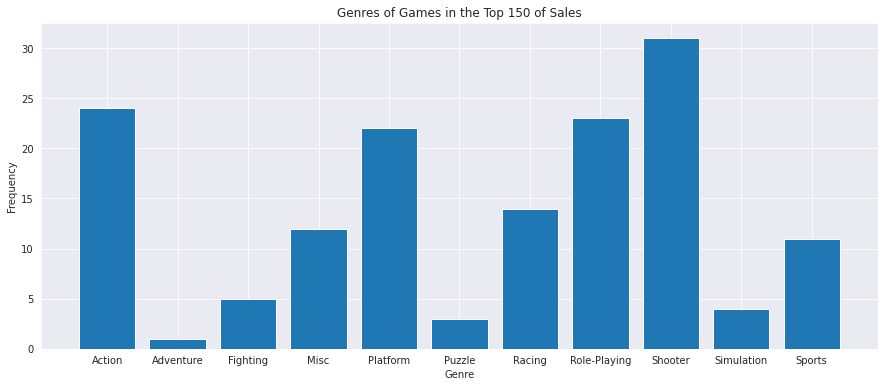

In [113]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
plt.title("Genres of Games in the Top 150 of Sales")
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.bar(genre_top_150_df.index, genre_top_150_df.Rank);

Also a comparisson between sales worldwide and each region:

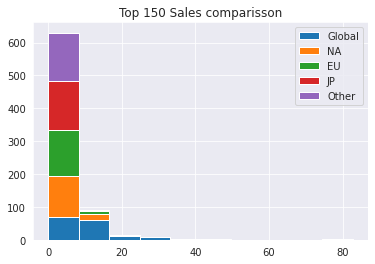

In [115]:
plt.title('Top 150 Sales comparisson')
plt.hist([top_150_df.Global_Sales, top_150_df.NA_Sales, top_150_df.EU_Sales, top_150_df.JP_Sales, top_150_df.Other_Sales], 
         stacked=True);
plt.legend(['Global', 'NA', 'EU', 'JP', 'Other']);

In [78]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "alejoso76/videogames-data-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/alejoso76/videogames-data-course-project


'https://jovian.ml/alejoso76/videogames-data-course-project'

## References and Future Work
As for my future work, I will analyze some data from my favorite game: Rainbow Six Siege. The data I want to check is some [ranked insights](https://www.kaggle.com/maxcobra/rainbow-six-siege-s5-ranked-dataset).
All the resources I used are from the [Zero to Pandas Course](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas).
I LOVED DOING THIS COURSE :)


In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
